## The New York Times Covid-19 Database

The New York Times Covid-19 Database is 
a county-level database of confirmed cases and deaths, 
compiled from state and local governments and health departments across the United States.
The initial release of the database was on Thursday, March 26, 2020, and it is updated daily. 

These data have fueled many articles and graphics by The Times; these are updated regularly at
[https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html). 
The Times has created many visualizations that are effective communications of important information about the pandemic. 

The data are publically available via GitHub: [https://github.com/nytimes/covid-19-data](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).  In this illustration we will only use
the data aggregated at the state level. 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
covid_table = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
covid_table = covid_table.drop('fips', axis=1)
covid_table.tail(20)

,date,state,cases,deaths
30794,2021-09-13,North Dakota,122768,1605
30795,2021-09-13,Northern Mariana Islands,252,2
30796,2021-09-13,Ohio,1304193,21154
30797,2021-09-13,Oklahoma,584692,8208
30798,2021-09-13,Oregon,301504,3451
30799,2021-09-13,Pennsylvania,1350719,28568
30800,2021-09-13,Puerto Rico,210703,3003
30801,2021-09-13,Rhode Island,166811,2802
30802,2021-09-13,South Carolina,802328,11306
30803,2021-09-13,South Dakota,137300,2088


### Process the recent data

Here is some code that creates a Table with the recent Covid-19 statistics for a given state. Just pass in the name of the state as a string.


In [3]:
merged_data = covid_table.drop('state', axis=1)
merged_data = merged_data.groupby('date').sum()
merged_data.tail(20)

,cases,deaths
date,,
2021-08-25,38364887,632522
2021-08-26,38552648,634735
2021-08-27,38748559,636509
2021-08-28,38833818,637076
2021-08-29,38875976,637356
2021-08-30,39156379,639081
2021-08-31,39316629,640519
2021-09-01,39527624,642454
2021-09-02,39703320,645391


In [4]:
new_cases = np.diff(merged_data['cases'])

# compute 7-day average
avg_cases = np.zeros(7)
for i in np.arange(7, len(new_cases)):
    avg_cases = np.append(avg_cases, np.mean(new_cases[(i-6):i+1]))

dates = np.array(merged_data['cases'].index)[1:]
data = np.array([new_cases, avg_cases]).T
cvd19 = pd.DataFrame(data, columns = ['new cases', '7-day avg'], index=dates)
cvd19.tail(10)

,new cases,7-day avg
2021-09-04,66054.0,161004.428571
2021-09-05,44417.0,161327.142857
2021-09-06,76976.0,132266.142857
2021-09-07,301138.0,152393.000000
2021-09-08,184189.0,148563.571429
2021-09-09,170460.0,147815.571429
2021-09-10,176427.0,145665.857143
2021-09-11,73926.0,146790.428571
2021-09-12,39345.0,146065.857143
2021-09-13,261341.0,172403.714286


In [5]:
cvd19.describe()

,new cases,7-day avg
count,601.000000,601.000000
mean,68700.610649,67960.206560
std,66805.591993,62527.840022
min,-23999.000000,0.000000
25%,23659.000000,23020.571429
50%,47493.000000,50156.571429
75%,79391.000000,81212.285714
max,301138.000000,259616.142857


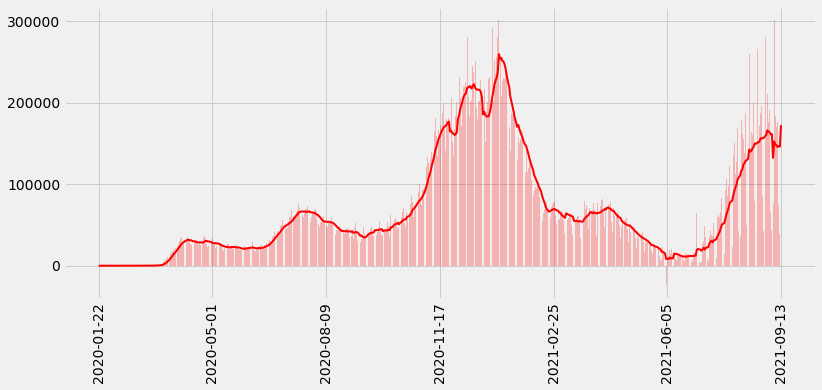

In [6]:
plt.figure(figsize=(12,5))
plt.bar(cvd19.index, cvd19['new cases'], color='red', alpha=.25)
plt.plot(cvd19.index, cvd19['7-day avg'], color='red', linewidth=2)
plt.xlabel('')
_ = plt.xticks(cvd19.index[[0, 100, 200, 300, 400, 500, len(dates)-1]], rotation=90)
_ = plt.yticks(np.linspace(0, 300000, 4))

Compare this to the graph here: [https://github.com/nytimes/covid-19-data](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).


Let's now take the data going back to early April


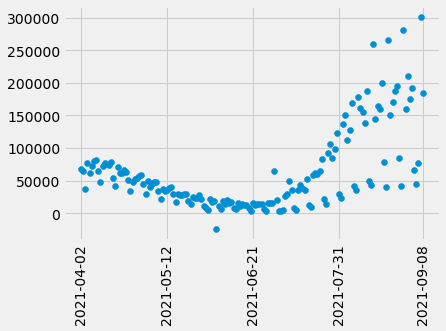

In [7]:
recent = cvd19[(cvd19.index > '2021-04-01') & (cvd19.index < '2021-09-09')]
y = recent['new cases']
dates = recent.index
plt.scatter(dates, y)
_ = plt.xticks(dates[[0, 40, 80, 120, len(dates)-1]], rotation=90)

Now let's remove the data on the weekends

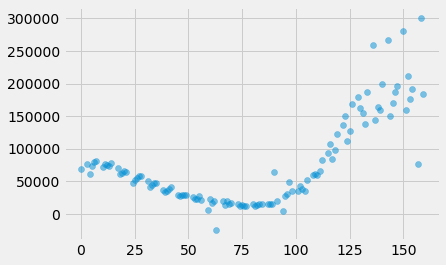

In [8]:
y = np.array(y)
x = np.arange(len(y))
dates = np.array(dates)
is_weekday = (x % 7 != 1) & (x % 7 != 2)
plt.scatter(x[is_weekday], y[is_weekday], alpha=.5)


Next, fit a linear regression to the data

In [9]:
import statsmodels.api as sm
x_week = x[is_weekday]
y_week = y[is_weekday]
X = sm.add_constant(x_week)
model = sm.OLS(y_week, X)
result = model.fit()
beta = [result.params[0], result.params[1]]

Finally, plot the results

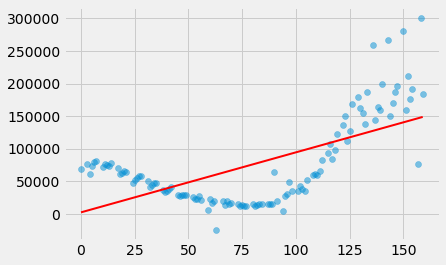

In [10]:
plt.scatter(x_week, y_week, alpha=.5)
_ = plt.plot(x_week, beta[0] + beta[1]*x_week, color='red', linewidth=2)

Let's now fit a quadratic model by just adding a variable $x^2$

In [11]:
X = sm.add_constant(x_week)
model = sm.OLS(y_week, X)
result = model.fit()
beta = [result.params[0], result.params[1]]

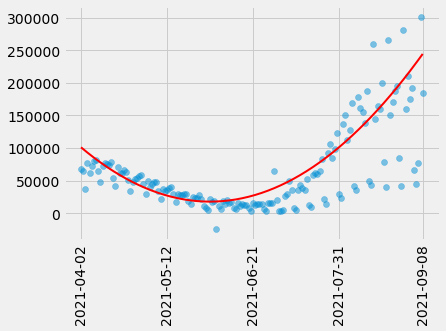

In [12]:
# form an array with 1, x, x^2

x_week = x[is_weekday]
y_week = y[is_weekday]
X = np.array([np.ones(len(x_week)), x_week, x_week**2])
X = X.T

# fit a linear model
model = sm.OLS(y_week, X)
result = model.fit()
beta = [result.params[0], result.params[1], result.params[2]]

# plot the result
week_dates = dates[is_weekday]
plt.scatter(dates, y, alpha=.5)
plt.plot(x, beta[0] + beta[1]*x + beta[2]*x**2, color='red', linewidth=2)
_ = plt.xticks(dates[[0, 40, 80, 120, len(dates)-1]], rotation=90)


A much better fit! The take-away: By removing "outliers" and adding "features" of the original data, we can get more accurate fits to the data.

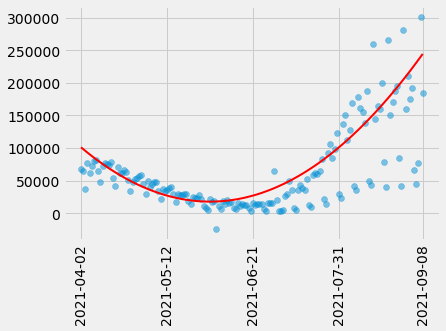

In [13]:
# Here is the same thing but using "matrix/vector thinking" with numpy

beta = np.array([result.params[0], result.params[1], result.params[2]])
yhat = X @ beta

# plot the result
week_dates = dates[is_weekday]
plt.scatter(dates, y, alpha=.5)
plt.plot(X[:,1], yhat, color='red', linewidth=2)
_ = plt.xticks(dates[[0, 40, 80, 120, len(dates)-1]], rotation=90)

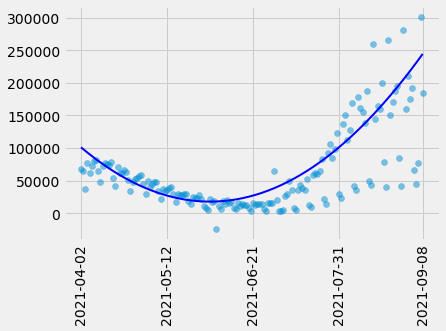

In [14]:
from scipy.optimize import minimize

def covid19_quadratic_rmse(beta):
    x = x_week
    y = y_week
    estimate = beta[0] + beta[1]*x + beta[2]*(x**2)
    return np.mean((y - estimate) ** 2) ** 0.5

opt = minimize(covid19_quadratic_rmse, x0=np.zeros(3))
beta_new = opt.x

plt.scatter(dates, y, alpha=.5)
plt.plot(x, beta_new[0] + beta_new[1]*x + beta_new[2]*x**2, color='blue', linewidth=2)
_ = plt.xticks(dates[[0, 40, 80, 120, len(dates)-1]], rotation=90)


The take-away here: We can fit the model by numerically optimizing the least squares fit, with minimal math! This is what many machine learning methods do.